In [1]:
import numpy as np
import matplotlib.pyplot as plt

from waveform.waveforms import BNS
from waveform.mathtools import proper_distance

In [2]:
plt.rcParams['font.size'] = 18
plt.rcParams['font.serif'] = 'Times New Roman'
csfont = {'fontname':'Times New Roman'}
hfont = {'fontname':'Times New Roman'}
plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

greyish = '#3e5879'
blueish = '#7092be'
blue    = '#3cb5e9'
red     = '#e93c3c'
green   = '#15a87c'
lavender= '#FA92FF'
pinkish = '#CC79A3'
yellish = '#3F48CC'
aqua    = '#288269'
orange  = '#F57528'
burgundy = '#800020'
plum    = '#873073'

# Test - GW170817 #
To check the waveform model is behaving, let's compute the SNR of the BNS merger GW170817. The Detector response values were obtained using pycbc, but in principle my package only needs to be edited slightly to compute them also (namely, the interferometer opening angles and direction of the primary arm are not currently implemented). 

If the model is working correctly, we should obtain a network SNR of $\rho = 32.4$...

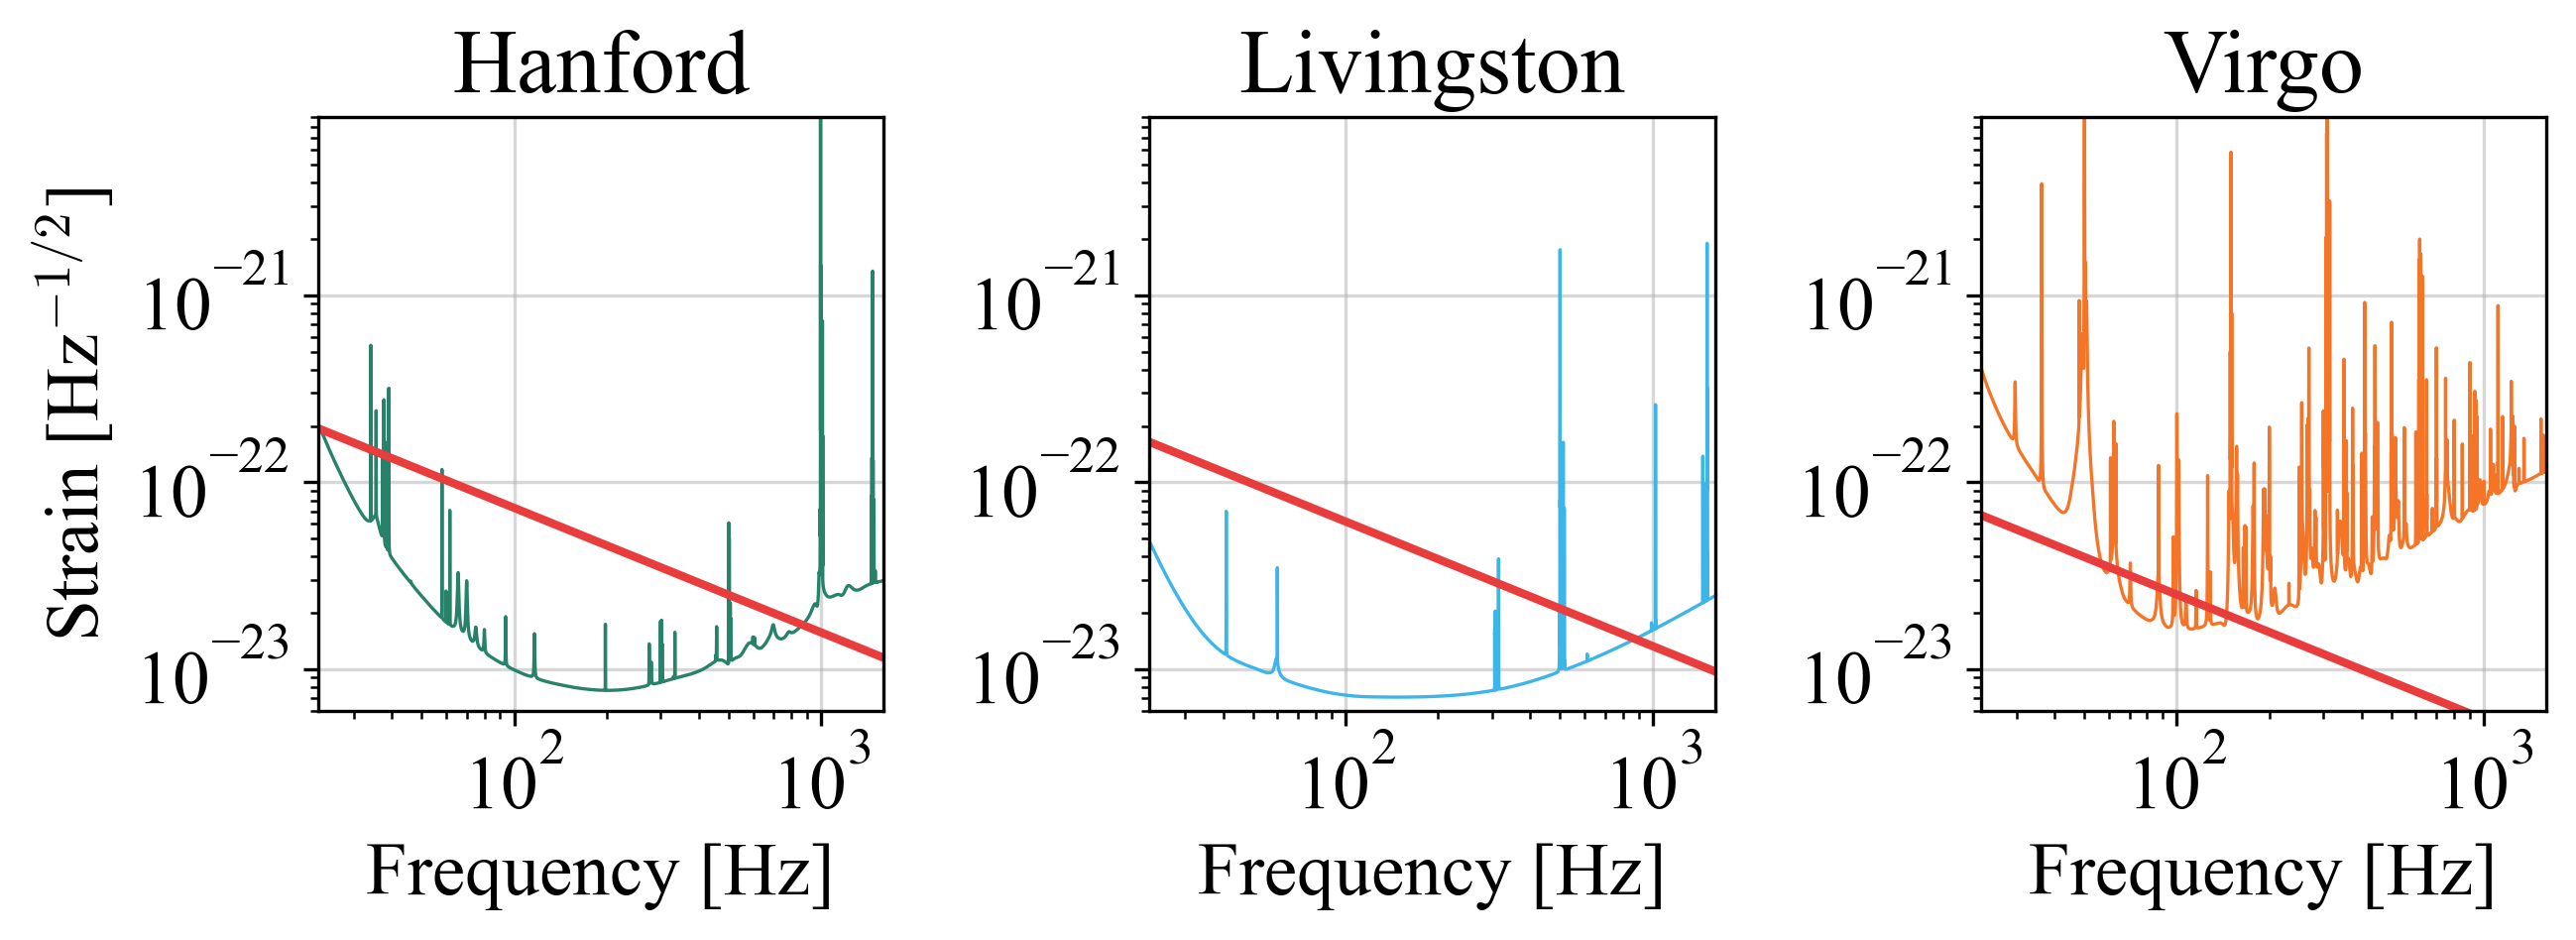

In [3]:
z = 0.009783
params = [1.46,1.27,proper_distance(z),197.448762*(np.pi/180), -23.383962*(np.pi/180), 2.59, 3.2, 'APR4']

fig, axs = plt.subplots(1,3,figsize=(9,3.5),dpi=300)
axs[0].set_xscale('log',base=10)
axs[1].set_xscale('log',base=10)
axs[2].set_xscale('log',base=10)
axs[0].set_yscale('log',base=10)
axs[1].set_yscale('log',base=10)
axs[2].set_yscale('log',base=10)
axs[0].set_xlabel('Frequency [Hz]')
axs[1].set_xlabel('Frequency [Hz]')
axs[2].set_xlabel('Frequency [Hz]')
axs[0].set_ylabel('Strain [Hz$^{-1/2}$]')

gw170817a = BNS(params, z=z,detector='ET',psd_file='PSD_data/GW170817_L_PSD.txt')
gw170817a.Q = 0.6400155627822722 #from pycbc
f, psd = gw170817a.get_PSD_data()
d1 = np.abs(gw170817a.waveform(f))
asd = np.sqrt(psd)
axs[1].plot(f, asd, label='Livingston ASD',color=blue,lw=0.8)
axs[1].plot(f,np.sqrt(f)*d1,color=red,lw=2)

gw170817b = BNS(params, z=z,detector='ET',psd_file='PSD_data/GW170817_H_PSD.txt')
gw170817b.Q = 0.7572493629351184 #from pycbc
f, psd = gw170817b.get_PSD_data()
d2 = np.abs(gw170817b.waveform(f))
asd = np.sqrt(psd)
axs[0].plot(f, asd,color=aqua,lw=0.8)
axs[0].plot(f,np.sqrt(f)*d2,color=red,lw=2)

gw170817c = BNS(params, z=z,detector='ET',psd_file='PSD_data/GW170817_V_PSD.txt')
gw170817c.Q = 0.2601005327054374 #from pycbc
f, psd = gw170817c.get_PSD_data()
d3 = np.abs(gw170817c.waveform(f))
asd = np.sqrt(psd)
axs[2].plot(f, asd, label='Virgo ASD',color=orange,lw=0.8)
axs[2].plot(f,np.sqrt(f)*d3,color=red,lw=2)

axs[0].set_xlim(23,np.max(f))
axs[1].set_xlim(23,np.max(f))
axs[2].set_xlim(23,np.max(f))

axs[0].set_ylim(6e-24,9e-21)
axs[1].set_ylim(6e-24,9e-21)
axs[2].set_ylim(6e-24,9e-21)

axs[0].grid(True,alpha=0.5)
axs[1].grid(True,alpha=0.5)
axs[2].grid(True,alpha=0.5)

axs[0].set_title('Hanford')
axs[1].set_title('Livingston')
axs[2].set_title('Virgo')

plt.tight_layout()
plt.show()

In [4]:
print('Network SNR = ', np.sqrt(gw170817a.SNR()**2 +gw170817b.SNR()**2 +gw170817c.SNR()**2))

print('Hanford SNR = ',gw170817b.SNR())
print('Livingston SNR = ',gw170817a.SNR())
print('Virgo SNR = ',gw170817c.SNR())

Network SNR =  30.74893923483726
Hanford SNR =  18.042052701380126
Livingston SNR =  24.73989381989941
Virgo SNR =  2.8141165875704512


The result is smaller by $\approx 1.7$. This can be attributed to interpolating the detector PSDs and using an incomplete waveform model (the LIGO analysis uses complete IMR waveform templates, so I expect the SNR to be greater in their calculation). This could also be due to the response values differing slightly from what they actually were; Virgo had an SNR of approximately 2, whereas here it is 2.8.